In [46]:
# 切换工作目录，主要适用于google colab中的开发
import os

if "模拟退火.ipynb" not in os.listdir():
  try:
    os.chdir("drive/MyDrive")
    os.chdir("NN_Homework")
    os.chdir("HW6")
  except:
    print("无法找到正确工作目录！")

assert "模拟退火.ipynb" in os.listdir()

In [47]:
import numpy as np
np.random.seed(2020)
def obj(x):
  x1,x2=x[0],x[1]
  return 0.2+x1**2+x2**2-0.1*np.cos(6*np.pi*x1)-0.1*np.cos(6*np.pi*x2)

def accept(T,x_new,x_old):
  # 能量的差值
  delta_energy = obj(x_new) - obj(x_old)
  # 如果能量降低直接接受
  if delta_energy < 0:
    return True
  else:
    xi = np.random.rand()
    # 按照温度控制系数，概率接受
    if xi < np.exp(-delta_energy / T):
      return True
  
  return False

def small_shift(index_x,domain):
  s = np.random.randint(-30,30,2)
  new_index_x = [np.clip(index_x[i]+s[i],0,domain.shape[0]-1) for i in range(2)]
  return new_index_x

# 初始化
domain = np.arange(-1.0,1.01,0.01)
x = [0.8, -0.5]
index_x = [np.where(np.isclose(domain,x[i]))[0][0] for i in range(2)]
lam = pow((-1.0/np.log(0.001)) / (-1.0/np.log(0.7)), 1.0/50)
T = -1.0/np.log(0.7)

[-0.3399999999999994, -0.01999999999999913]


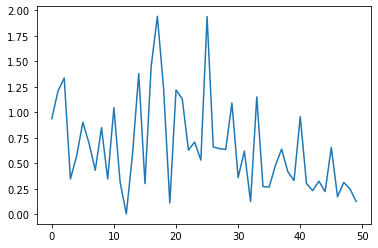

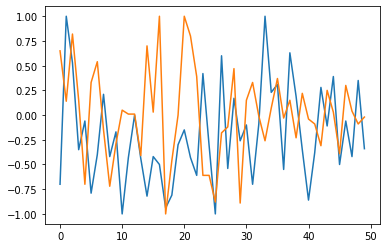

In [48]:
# 训练过程
import matplotlib.pyplot as plt
obj_list = []
x1_list = []
x2_list = []

for epoch in range(50):
  for batch in range(50):
    new_index_x = small_shift(index_x,domain)
    new_x = [domain[i] for i in new_index_x]
    if accept(T,new_x,x):
      x = new_x
      index_x = new_index_x
  
  obj_list.append(obj(x))
  x1_list.append(x[0])
  x2_list.append(x[1])

  T *= lam

print(x)
plt_X = range(len(obj_list))
plt.plot(plt_X,obj_list)
plt.show()
plt.plot(plt_X,x1_list,plt_X,x2_list)
plt.show()